# Compare injections

## Preamble

### Imports

In [128]:
import psutil
p = psutil.Process()
p.cpu_affinity([0])

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tqdm import tqdm
import json
import numpy as np

import jax
print(jax.devices())
import jax.numpy as jnp
from jimgw.prior import Uniform, Composite
import matplotlib.pyplot as plt
params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)
import pickle

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import bilby

no_noise = True

[CpuDevice(id=0)]


## Save Bilby injection

In [129]:
injection_file = json.load(open("./bilby_data/injection_dict.json", 'r'))

In [130]:
# Load the injection dict
keys = ['chirp_mass', 'mass_ratio', 'chi_1', 'chi_2', 'luminosity_distance',
        'theta_jn', 'psi', 'phase', 'geocent_time', 
        'ra', 'dec', 'lambda_1', 'lambda_2']

injection_parameters = {}
print("Injection parameters:")
for key in keys:
    value = injection_file[f"event_14"][key]
    injection_parameters[key] = value
    print(f"{key}: {value}")

Injection parameters:
chirp_mass: 1.9568677619484602
mass_ratio: 0.8774162003394455
chi_1: 0.009735110398633173
chi_2: 0.048980590878307986
luminosity_distance: 126.18218167071768
theta_jn: -0.87723200939735
psi: 0.5161579022094159
phase: 3.238585218011449
geocent_time: 1187008882.43
ra: 5.978101120559757
dec: -0.01944744929956209
lambda_1: 1064.683599128085
lambda_2: 3723.7220879878337


In [131]:
# Frequency grid
reference_frequency = 20.
minimum_frequency = 20
sampling_frequency = 4096.0
duration = 128.0

seed = 1446

# Get the waveform approximaat
approximant = "TaylorF2"
waveform_arguments = dict(
    waveform_approximant=approximant,
    reference_frequency=reference_frequency,
    minimum_frequency=minimum_frequency)
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model = bilby.gw.source.lal_binary_neutron_star,                    
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=waveform_arguments)

# Get ifos and inject the signal
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])

bilby.core.utils.random.seed(seed)
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency

if no_noise:
    ifos.set_strain_data_from_zero_noise(
        sampling_frequency=sampling_frequency,
        duration=duration, 
        start_time=(injection_parameters['geocent_time'] - duration + 2))
else:
    ifos.set_strain_data_from_power_spectral_densities(
        sampling_frequency=sampling_frequency,
        duration=duration, 
        start_time=(injection_parameters['geocent_time'] - duration + 2))

# Finally, inject the signal
ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)

07:04 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters
07:04 bilby INFO    : Injected signal in H1:
07:04 bilby INFO    :   optimal SNR = 15.99
07:04 bilby INFO    :   matched filter SNR = 15.99+0.00j
07:04 bilby INFO    :   chirp_mass = 1.9568677619484602
07:04 bilby INFO    :   mass_ratio = 0.8774162003394455
07:04 bilby INFO    :   chi_1 = 0.009735110398633173
07:04 bilby INFO    :   chi_2 = 0.048980590878307986
07:04 bilby INFO    :   luminosity_distance = 126.18218167071768
07:04 bilby INFO    :   theta_jn = -0.87723200939735
07:04 bilby INFO    :   psi = 0.5161579022094159
07:04 bilby INFO    :   phase = 3.238585218011449
07:04 bilby INFO    :   geocent_time = 1187008882.43
07:04 bilby INFO    :   ra = 5.978101120559757
07:04 bilby INFO    :   dec = -0.01944744929956209
07:04 bilby INFO

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         5.22748963e-26-9.04518140e-26j, 5.24798500e-26-9.03325170e-26j,
         5.26845324e-26-9.02127551e-26j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -8.20969414e-26-4.74463575e-26j, -8.19886637e-26-4.76323800e-26j,
         -8.18799640e-26-4.78181562e-26j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         5.22748963e-26-9.04518140e-26j, 5.24798500e-26-9.03325170e-26j,
         5.26845324e-26-9.02127551e-26j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -8.20969414e-26-4.74463575e-26j, -8.19886637e-26-4.76323800e-26j,
         -8.18799640e-26-4.78181562e-26j])},
 {'plus': ar

In [132]:
for ifo in ifos:
    ### Get the frequencies and the strain, and mask it 
    my_freqs = ifo.frequency_array
    mask = ifo.strain_data.frequency_mask
    my_strain = ifo.strain_data.frequency_domain_strain
    my_freqs = my_freqs[mask]
    my_strain = my_strain[mask]
    ### Save to npz array
    if no_noise:
        np.savez(f"./bilby_data/{ifo.name}_data_no_noise.npz", 
                frequency=my_freqs,
                data=my_strain)
    else:
        np.savez(f"./bilby_data/{ifo.name}_data.npz", 
                frequency=my_freqs,
                data=my_strain)

# Load data

In [133]:
jim_path = "/home/thibeau.wouters/jim_injections/tidal/redo_slurm/injection_14_save_npz/"
bilby_path = f"./bilby_data/"

In [134]:
# Load the data
my_dict = {}
ifo_names = ["H1", "L1", "V1"]
code_names = ["bilby", "jim"]

paths = {"bilby": bilby_path, 
         "jim": jim_path}

for code_name in code_names:
    my_dict[code_name] = {}
    for ifo_name in ifo_names:
        my_dict[code_name][ifo_name] = {}
        if no_noise:
            filename = f"{paths[code_name]}{ifo_name}_data_no_noise.npz"
        else:
            filename = f"{paths[code_name]}{ifo_name}_data.npz"
        print(filename)
        file = np.load(filename)
        if code_name == "bilby":
            frequencies = file['frequency']
            data = file['data']
        else:
            frequencies = file['freqs']
            data = file['data']
        my_dict[code_name][ifo_name]["frequencies"] = frequencies
        my_dict[code_name][ifo_name]["data"] = data
        

./bilby_data/H1_data_no_noise.npz
./bilby_data/L1_data_no_noise.npz
./bilby_data/V1_data_no_noise.npz
/home/thibeau.wouters/jim_injections/tidal/redo_slurm/injection_14_save_npz/H1_data_no_noise.npz
/home/thibeau.wouters/jim_injections/tidal/redo_slurm/injection_14_save_npz/L1_data_no_noise.npz
/home/thibeau.wouters/jim_injections/tidal/redo_slurm/injection_14_save_npz/V1_data_no_noise.npz


In [135]:
print(my_dict["bilby"]["H1"])

{'frequencies': array([  20.       ,   20.0078125,   20.015625 , ..., 2047.984375 ,
       2047.9921875, 2048.       ]), 'data': array([ 4.66593653e-24-1.21573320e-23j, -1.03113026e-23+7.94318992e-24j,
        1.29283389e-23-1.45637419e-24j, ...,
       -2.87876799e-26-5.12636843e-26j, -2.34801584e-26-5.39012730e-26j,
       -1.79340802e-26-5.59910981e-26j])}


H1
(259584,)


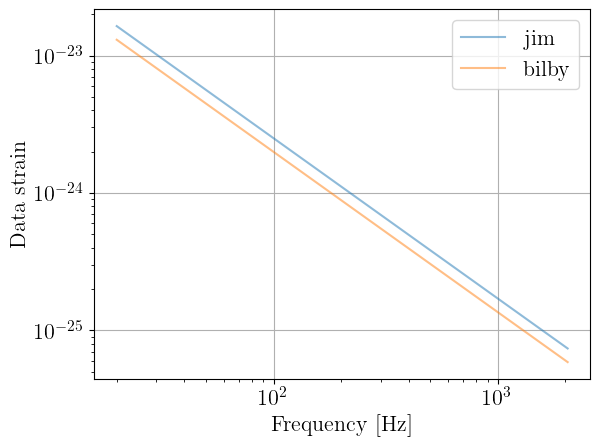

L1
(259584,)


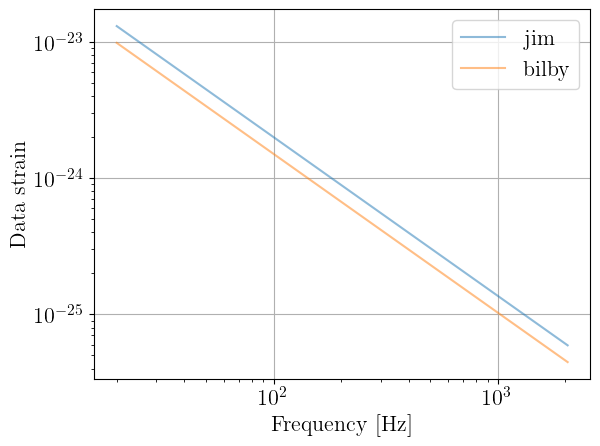

V1
(259584,)


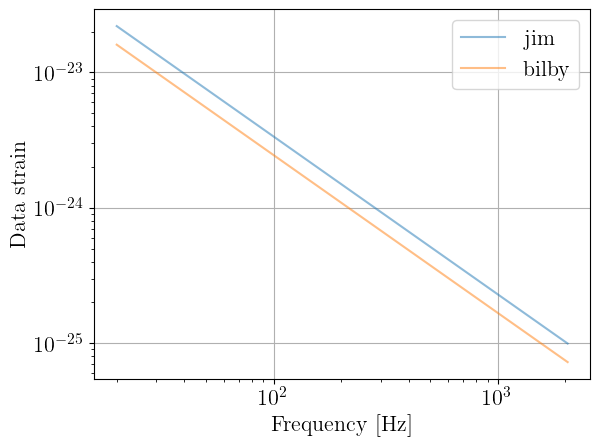

In [136]:
alpha = 0.5
for ifo_name in ifo_names:
    print(ifo_name)
    plt.figure()
    jim_freqs = my_dict["jim"][ifo_name]["frequencies"]
    jim_data = np.abs(my_dict["jim"][ifo_name]["data"])
    bilby_freqs = my_dict["bilby"][ifo_name]["frequencies"][:-1]
    bilby_data = np.abs(my_dict["bilby"][ifo_name]["data"])[:-1]
    print(np.shape(jim_freqs))
    plt.loglog(jim_freqs, jim_data, label="jim", alpha=alpha)
    plt.loglog(bilby_freqs, bilby_data, label="bilby", alpha=alpha)
    plt.legend()
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Data strain")
    plt.show()

In [137]:
factors_list = []
for ifo_name in ifo_names:
    factors_list.append(np.mean(np.abs(my_dict["jim"][ifo_name]["data"]) / np.abs(my_dict["bilby"][ifo_name]["data"][:-1])))
factors_list = np.array(factors_list)
print(factors_list)

[1.25691155 1.32801735 1.37173148]


In [ ]:
true_mc = 1.9568677619484602
for factor in factors_list:
    ffactor = factor ** (6/5)
    print(ffactor * true_mc)

1.3157266201847
2.5747030065768457
1.4055441661727772
2.750464066778237
1.4612446261835916
2.8594625012990993


In [139]:
my_factor = np.prod(factors_list ** (6/5))
print(my_factor * true_mc)

5.288037960566933
